##LCD Equation

PDE $ u_t + c*u_x - v*u_{xx} = 0 $ with c = v = 1<br>
Valid in Domain: $ x \in [-1,1] $ and $ t \in (0,1] $<br>
Initial Condition: $ u(0,x) = - \sin(\pi x) $<br>
Boundary Condition: $ u(t,-1) = u(t,1) = 0 $<br>

In [ ]:
import numpy as np

v = 1
pi = np.pi
c = 1
n_x = 60
n_t = 10000
t_i = 0
t_f = 1
dt = (t_f-t_i)/n_t
x_i = -1
x_f = 1
dx = (x_f-x_i)/n_x

X = np.linspace(x_i,x_f,n_x+1)
T = np.linspace(t_i,t_f,n_t+1)

# Initial Condition
def u_init(x):
  return -np.sin(pi*x)
u = [u_init(m) for m in X]

# Boundary Condition
u_0 = 0 # at x = -1
u_n = 0 # at x = 1

t = t_i
u_old = u

In [ ]:
from time import time

U = [u_old]
t0 = time()
while ((t+dt) <= t_f):
    u_new = [u_0]*n_x
    u_new.append(u_n)
    for i in range(1,n_x):
        u_new[i] = u_old[i] + (v*dt/(dx**2))*(u_old[i+1]+u_old[i-1]-(2*u_old[i])) - (c*dt/(2*dx))*(u_old[i+1]-u_old[i-1])
    U.append(u_new)
    u_old = u_new
    t += dt
print('Computation Time = {} seconds'.format(time()-t0))

Computation Time = 0.7280511856079102 seconds


In [ ]:
U2 = np.array(U)
U2

array([[ 1.22464680e-16,  1.04528463e-01,  2.07911691e-01, ...,
        -2.07911691e-01, -1.04528463e-01, -1.22464680e-16],
       [ 0.00000000e+00,  1.04113525e-01,  2.07399945e-01, ...,
        -2.08013410e-01, -1.04737260e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.03727985e-01,  2.06888986e-01, ...,
        -2.08114707e-01, -1.04917780e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  3.91923485e-04,  7.95906873e-04, ...,
         1.99627726e-03,  1.01627876e-03,  0.00000000e+00],
       [ 0.00000000e+00,  3.91815016e-04,  7.95686614e-04, ...,
         1.99574527e-03,  1.01600795e-03,  0.00000000e+00],
       [ 0.00000000e+00,  3.91706578e-04,  7.95466418e-04, ...,
         1.99521341e-03,  1.01573721e-03,  0.00000000e+00]])

In [ ]:
np.max(U2),np.min(U2)

(1.0, -1.0)

Text(0.5, 0.92, 'Numerical Solution')

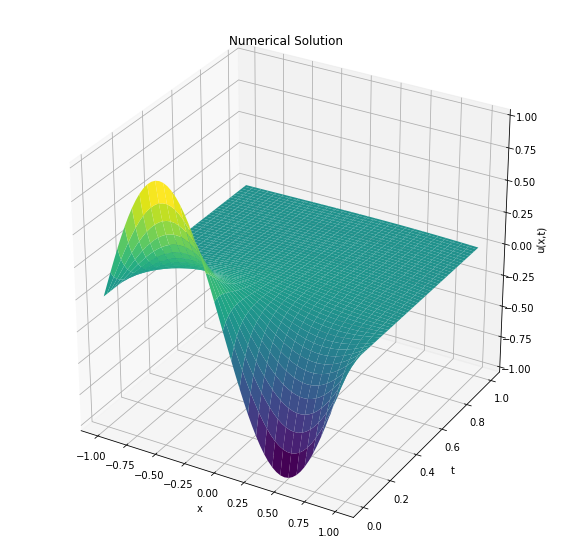

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
T2, X2 = np.meshgrid(T, X)
ax.plot_surface(X2, T2, U2.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Numerical Solution')

In [ ]:
U2.shape,X2.shape,T2.shape

((10001, 61), (61, 10001), (61, 10001))

In [ ]:
import tensorflow as tf
import pickle
DTYPE = 'float32'

In [ ]:
import math as m

tf.keras.backend.set_floatx(DTYPE) # sets the default float type as 32-bit float
v = tf.constant(1., dtype=DTYPE)
pi = tf.constant(m.pi, dtype=DTYPE)
c = v

def u_init(x): # calculates u value at initial data points
  return -tf.sin(pi * x)

def u_bound(t, x): # calculates u value at boundary data points
  n = x.shape[0]
  return tf.zeros((n,1), dtype=DTYPE)

def f_val(u, u_t, u_x, u_xx): # calculates f value given u and its derivatives
  return u_t + c*u_x - v*u_xx

In [ ]:
# Training Data

Ni, Nb, Nc = 50, 50, 10000 # no of initial, boundary and collocation points

tmin, tmax = tf.constant(0.), tf.constant(1.) # lower and upper limit on time
xmin, xmax = -tf.constant(1.), tf.constant(1.) # lower and upper limit on x

tf.random.set_seed(0) # random seed for reproducible results

ti = tf.ones((Ni,1))*tmin # tmin repeated Ni times
xi = tf.random.uniform((Ni,1), xmin, xmax, dtype=DTYPE) # uniformly sample bwn xmin and xmax
init = tf.concat([ti, xi], axis=1) # Initial Data Points
ui = u_init(xi) # Evaluate Initial Condition

tb = tf.random.uniform((Nb,1), tmin, tmax, dtype=DTYPE) # uniformly sample bwn tmin and tmax
bin = tf.keras.backend.random_bernoulli((Nb,1), 0.5, dtype=DTYPE) # randomly generate 0 or 1 Nb times
xb = xmin + (xmax - xmin) * bin # convert 0s and 1s to xmin and xmax
bound = tf.concat([tb, xb], axis=1) # Boundary Data Points
ub = u_bound(tb, xb) # Evaluate Boundary Condition

tc = tf.random.uniform((Nc,1), tmin, tmax, dtype=DTYPE) # uniformly sample bwn tmin and tmax
xc = tf.random.uniform((Nc,1), xmin, xmax, dtype=DTYPE) # uniformly sample bwn xmin and xmax
coll = tf.concat([tc, xc], axis=1) # Collocation Data Points

In [ ]:
filename = '/content/pinn_model.sav'
model = pickle.load(open(filename,'rb'))
grid = np.vstack([T2.flatten(),X2.flatten()]).T
input = tf.cast(grid,DTYPE)
u_pred = model(input)
U3 = u_pred.numpy().reshape(n_x+1,n_t+1)

In [ ]:
U3.shape

(61, 10001)

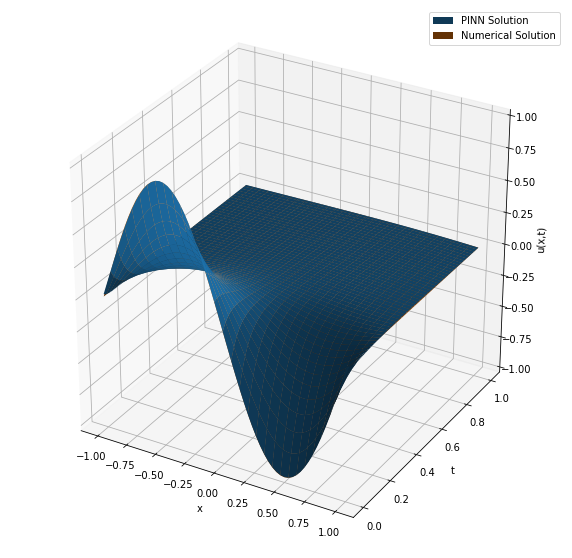

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
c1 = ax.plot_surface(X2, T2, U3, label = 'PINN Solution')
c1._facecolors2d = c1._facecolors3d
c1._edgecolors2d = c1._edgecolors3d
c2 = ax.plot_surface(X2, T2, U2.T, label = 'Numerical Solution')
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(U2.T,U3)

8.780051730126097e-06

##Heat Equation

PDE $ u_t - v*u_{xx} = 0 $ with v = 1<br>
Valid in Domain: $ x \in [-1,1] $ and $ t \in (0,1] $<br>
Initial Condition: $ u(0,x) = - \sin(\pi x) $<br>
Boundary Condition: $ u(t,-1) = u(t,1) = 0 $<br>
Analytical Solution: $ u (x, t) = -e^{-\pi^2t}\sin(\pi x)$<br>

In [ ]:
import numpy as np

v = 1
pi = np.pi
n_x = 60
n_t = 10000
t_i = 0
t_f = 1
dt = (t_f-t_i)/n_t
x_i = -1
x_f = 1
dx = (x_f-x_i)/n_x

X = np.linspace(x_i,x_f,n_x+1)
T = np.linspace(t_i,t_f,n_t+1)

# Initial Condition
def u_init(x):
  return -np.sin(pi*x)
u = [u_init(m) for m in X]

# Boundary Condition
u_0 = 0 # at x = -1
u_n = 0 # at x = 1

t = t_i
u_old = u

In [ ]:
from time import time

U = [u_old]
t0 = time()
while ((t+dt) <= t_f):
    u_new = [u_0]*n_x
    u_new.append(u_n)
    for i in range(1,n_x):
        u_new[i] = u_old[i] + (v*dt/(dx**2))*(u_old[i+1]+u_old[i-1]-(2*u_old[i]))
    U.append(u_new)
    u_old = u_new
    t += dt
print('Computation Time = {} seconds'.format(time()-t0))

Computation Time = 0.4664573669433594 seconds


Text(0.5, 0.92, 'Numerical Solution')

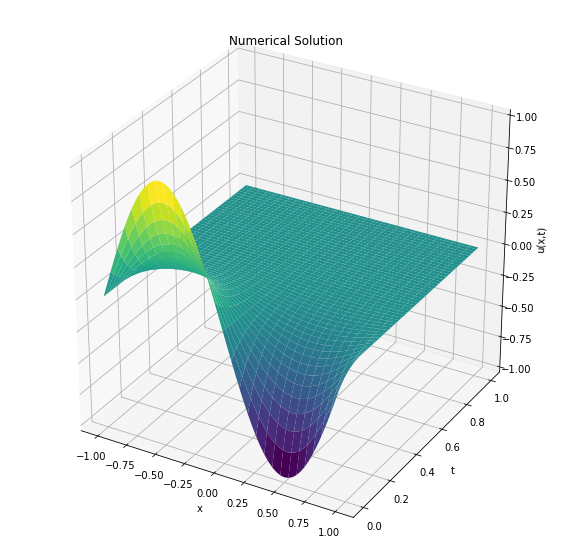

In [ ]:
U2 = np.array(U)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
T2, X2 = np.meshgrid(T, X)
ax.plot_surface(X2, T2, U2.T, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Numerical Solution')

In [ ]:
import tensorflow as tf
import pickle
import math as m

DTYPE = 'float32'
tf.keras.backend.set_floatx(DTYPE) # sets the default float type as 32-bit float
v = tf.constant(1., dtype=DTYPE)
pi = tf.constant(m.pi, dtype=DTYPE)

def u_init(x): # calculates u value at initial data points
  return -tf.sin(pi * x)

def u_bound(t, x): # calculates u value at boundary data points
  n = x.shape[0]
  return tf.zeros((n,1), dtype=DTYPE)

def f_val(u_t, u_xx): # calculates f value given u and its derivatives
  return u_t - v*u_xx

def u_anal(t,x): # calculates u value from analytical solution
  return -tf.multiply(tf.exp(-pi*pi*t),tf.sin(pi * x))

In [ ]:
# Training Data

Ni, Nb, Nc = 50, 50, 10000 # no of initial, boundary and collocation points

tmin, tmax = tf.constant(0.), tf.constant(1.) # lower and upper limit on time
xmin, xmax = -tf.constant(1.), tf.constant(1.) # lower and upper limit on x

tf.random.set_seed(0) # random seed for reproducible results

ti = tf.ones((Ni,1))*tmin # tmin repeated Ni times
xi = tf.random.uniform((Ni,1), xmin, xmax, dtype=DTYPE) # uniformly sample bwn xmin and xmax
init = tf.concat([ti, xi], axis=1) # Initial Data Points
ui = u_init(xi) # Evaluate Initial Condition

tb = tf.random.uniform((Nb,1), tmin, tmax, dtype=DTYPE) # uniformly sample bwn tmin and tmax
bin = tf.keras.backend.random_bernoulli((Nb,1), 0.5, dtype=DTYPE) # randomly generate 0 or 1 Nb times
xb = xmin + (xmax - xmin) * bin # convert 0s and 1s to xmin and xmax
bound = tf.concat([tb, xb], axis=1) # Boundary Data Points
ub = u_bound(tb, xb) # Evaluate Boundary Condition

tc = tf.random.uniform((Nc,1), tmin, tmax, dtype=DTYPE) # uniformly sample bwn tmin and tmax
xc = tf.random.uniform((Nc,1), xmin, xmax, dtype=DTYPE) # uniformly sample bwn xmin and xmax
coll = tf.concat([tc, xc], axis=1) # Collocation Data Points

In [ ]:
def u_model(n_hidden = 5, n_neurons = 256):
  model = tf.keras.Sequential() # Feed-Forward Neural Network
  model.add(tf.keras.Input(2)) # Input Layer for x and t
  scaling_layer = tf.keras.layers.Lambda(lambda x: 2.0*(x - tf.stack([tmin, xmin]))/(tf.stack([tmax, xmax]) - tf.stack([tmin, xmin])) - 1.0)
  model.add(scaling_layer)
  for i in range(n_hidden): # n_hidden layers each with n_neurons and swish activation
    model.add(tf.keras.layers.Dense(n_neurons, activation=tf.keras.activations.get('swish'), kernel_initializer='glorot_uniform',kernel_regularizer=tf.keras.regularizers.l2(10**(-6))))
  model.add(tf.keras.layers.Dense(1)) # Output Layer for u
  return model

In [ ]:
def get_f(model, cps): # calculate f given model and collocation data points
    with tf.GradientTape(persistent=True) as tape: # track operations to compute gradient
      t, x = cps[:, 0:1], cps[:, 1:2] # extract t and x data each having shape (Nc,1)
      tape.watch(t)
      tape.watch(x)
      u = model(tf.concat([t, x], axis=1)) # u as a function of t and x
      u_x = tape.gradient(u, x) # defined within context to compute 2nd derivative
    u_t = tape.gradient(u, t)
    u_xx = tape.gradient(u_x, x)
    del tape
    return f_val(u_t, u_xx)

def loss_fxn(model, init, ui, bound, ub, coll): # compute Loss given model and data
    pui = model(init) # Model prediction on initial data
    Li = tf.reduce_mean(tf.square(ui - pui)) # MSE for initial data
    pub = model(bound) # Model prediction on boundary data
    Lb = tf.reduce_mean(tf.square(ub - pub)) # MSE for boundary data
    f = get_f(model, coll) # calculate f given model and collocation data
    Lc = tf.reduce_mean(tf.square(f)) # MSE for collocation data (true f value is 0)
    loss = Li + Lb + Lc
    return loss

def L_and_grad_Lw(model, init, ui, bound, ub, coll): # compute gradient of loss wrt model weights
    with tf.GradientTape(persistent=True) as tape:
      tape.watch(model.trainable_variables) # keep track of operations on model training parameters
      loss = loss_fxn(model, init, ui, bound, ub, coll) # loss as a function of model (& hence weights)
    g = tape.gradient(loss, model.trainable_variables)
    del tape
    return loss, g

In [ ]:
model = u_model() # initialise the NN model
lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1500,3500],[1e-2,1e-3,5e-4]) # decreasing learning rate which is piecewise constant
optim = tf.keras.optimizers.Adam(learning_rate=lr) # Adam optimizer

@tf.function
def train_step():
  # compute loss and its gradient wrt model parameters
  loss, gradw = L_and_grad_Lw(model, init, ui, bound, ub, coll)
  # perform gradient descent step to update the parameters
  optim.apply_gradients(zip(gradw, model.trainable_variables))
  return loss

Final Loss = 8.494609e-06
Computation Time = 336.5783357620239 seconds


Text(0, 0.5, 'Loss')

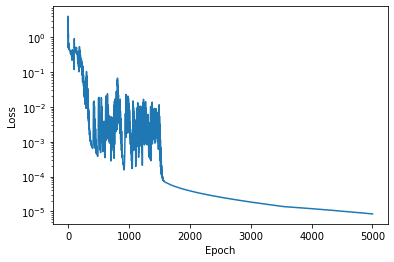

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from time import time
N = 5000 # no of epochs or training iterations
losses = []
t0 = time()
for i in range(1,N+1):
  loss = train_step()
  losses.append(loss.numpy())
print('Final Loss = '+str(losses[-1]))
print('Computation Time = {} seconds'.format(time()-t0))
epochs = [i for i in range(1,N+1)]
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
grid = np.vstack([T2.flatten(),X2.flatten()]).T
input = tf.cast(grid,DTYPE)
u_pred = model(input)
UP = u_pred.numpy().reshape(n_x+1,n_t+1)
ta,xa = tf.cast(T2,DTYPE),tf.cast(X2,DTYPE)
u_true = u_anal(ta,xa)
UT = u_true.numpy().reshape(n_x+1,n_t+1)

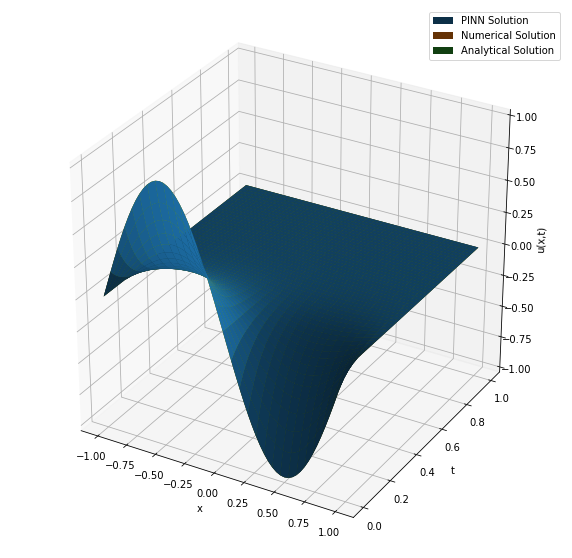

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
c1 = ax.plot_surface(X2, T2, UP, label = 'PINN Solution')
c1._facecolors2d = c1._facecolors3d
c1._edgecolors2d = c1._edgecolors3d
c2 = ax.plot_surface(X2, T2, U2.T, label = 'Numerical Solution')
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
c3 = ax.plot_surface(X2, T2, UT, label = 'Analytical Solution')
c3._facecolors2d = c3._facecolors3d
c3._edgecolors2d = c3._edgecolors3d
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(UT.flatten(), UP.flatten())

1.3548977e-07

In [ ]:
mean_squared_error(UT.flatten(), U2.T.flatten())

2.2055712077148144e-09

In [ ]:
mean_squared_error(UP,U2.T)

1.356224106604462e-07